In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# read in the merged csv

f = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/merged.csv')

Before we do anything else, we must create the target variable.  A patient must meet 2 conditions to have reached the desired outcomes, listed as follows:<br>

1.  Complete 24 weeks of treatment (this is validated by looking at the final 4 tests)<br>
2.  Show 4 consecutive clean urine tests for opiates for visits 21 -24

In [3]:
"""
create a new column named outcome
for each unique patient id
look at visit column and t_opiate column next to eachother
if there is a 1 for visit 21 - 24 in the t_opiate column then outcome = 0 else 1
"""
for i in f.patdeid.unique():
    if f.loc[(f['patdeid'] == i) & (f['VISIT'] >= 21) & (f['VISIT'] <= 24), 't_Opiate300'].any() == 0:
        f.loc[f['patdeid'] == i, 'outcome'] = 1
    else:
        f.loc[f['patdeid'] == i, 'outcome'] = 0


In [4]:
# create function to call random patient ID from patdeid column
def random_sample(df):
    return df.patdeid.sample(1).values[0]

In [5]:
# evaluate accuracy of target variable, outcome
f.loc[f.patdeid==random_sample(f),
['patdeid','VISIT','medication','total_dose','t_Opiate300','outcome']][:25]

,patdeid,VISIT,medication,total_dose,t_Opiate300,outcome
9539,801,0,1.0,30.0,0.0,1.0
9540,801,1,1.0,40.0,0.0,1.0
9541,801,2,1.0,60.0,0.0,1.0
9542,801,3,1.0,70.0,0.0,1.0
9543,801,4,1.0,80.0,0.0,1.0
9544,801,5,1.0,80.0,2.0,1.0
9545,801,6,1.0,80.0,0.0,1.0
9546,801,7,1.0,80.0,1.0,1.0
9547,801,8,1.0,80.0,0.0,1.0
9548,801,9,1.0,80.0,0.0,1.0


In [6]:
f.outcome.value_counts(normalize=True)

outcome
1.0    0.59053
0.0    0.40947
Name: proportion, dtype: float64

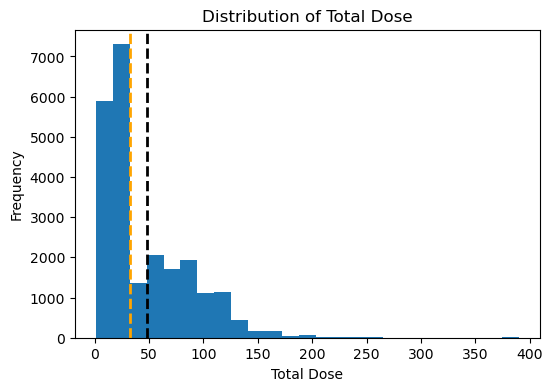

In [7]:
# review distribution of total dose

plt.figure(figsize=(6,4))
f.total_dose.plot(kind='hist', bins=25)
plt.title('Distribution of Total Dose')
plt.xlabel('Total Dose')
plt.ylabel('Frequency')
plt.axvline(f.total_dose.mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(f.total_dose.median(), color='orange', linestyle='dashed', linewidth=2)
plt.show()





Target variable 'outcome' successfully created<br>
<br>
Next we will need to differentiate between patients that completed 24 weeks of treatment and those that dropped out before 24 weeks<br>

In [8]:
# create new column 'c_t' for completed treatment
# for each unique value in patdeid column
# if count of values in visit column is 24 then c_t = 1 else 0

for i in f.patdeid.unique():
    if f.loc[f['patdeid'] == i, 'VISIT'].count() == 25:
        f.loc[f['patdeid'] == i, 'c_t'] = 1
    else:
        f.loc[f['patdeid'] == i, 'c_t'] = 0

In [13]:
# evaluate accuracy of c_t feature
f.loc[f.patdeid==random_sample(f),
['patdeid','VISIT','medication','total_dose','t_Opiate300','outcome','c_t']][:25]

,patdeid,VISIT,medication,total_dose,t_Opiate300,outcome,c_t
3626,291,0,2.0,16.0,1.0,1.0,0.0
3627,291,1,2.0,16.0,1.0,1.0,0.0
3628,291,2,2.0,24.0,1.0,1.0,0.0
3629,291,3,2.0,24.0,1.0,1.0,0.0
3630,291,4,2.0,24.0,1.0,1.0,0.0
3631,291,5,2.0,24.0,1.0,1.0,0.0
3632,291,6,2.0,24.0,1.0,1.0,0.0
3633,291,7,2.0,4.0,0.0,1.0,0.0
3634,291,8,2.0,4.0,0.0,1.0,0.0


In [14]:
f.c_t.value_counts(normalize=True)

c_t
1.0    0.79161
0.0    0.20839
Name: proportion, dtype: float64

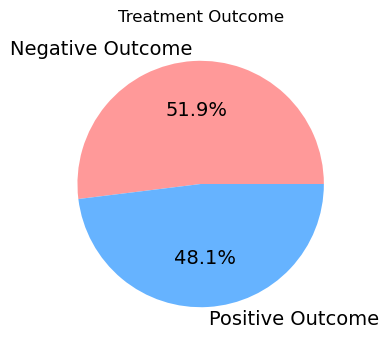

In [19]:
# create pie chart for treatment outcomes

f.loc[f.c_t==1.0, 'outcome'].value_counts().plot(kind='pie',
                                              title='Treatment Outcome',
                                              figsize=(6,4),
                                                autopct='%1.1f%%',
                                                labels=['Negative Outcome','Positive Outcome'],
                                                colors=['#ff9999','#66b3ff'],
                                                textprops={'fontsize': 14}),plt.ylabel('');
                                                

In [ ]:
# bar chart for opiate tests for patient population
f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar', 
                                                   figsize=(20,5), 
                                                   legend=False,
                                                   title='Positive Opiate Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests');

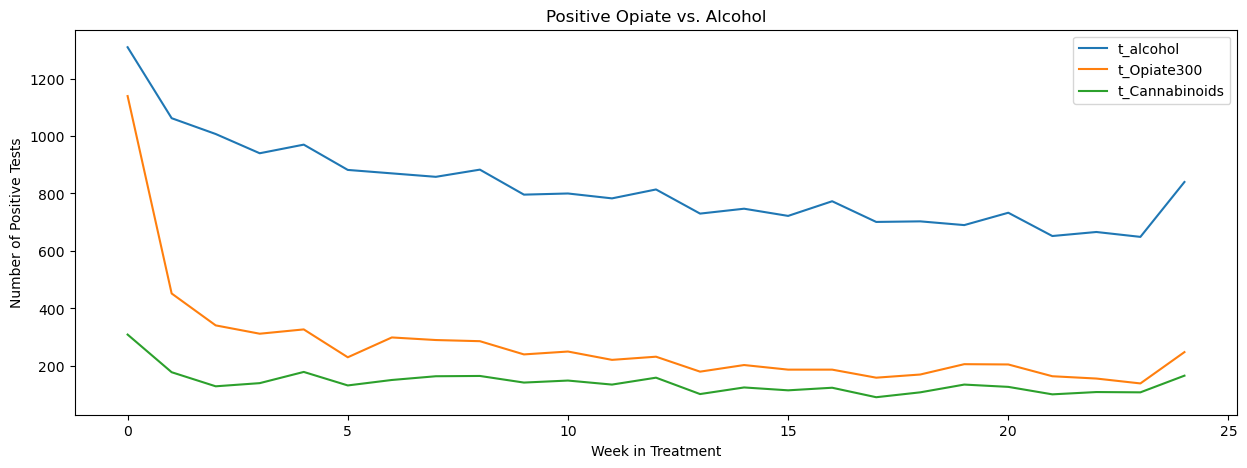

In [23]:
# lineplot comparing other positive tests to opiates

f.groupby('VISIT').agg({'t_alcohol':'sum',
                        't_Opiate300':'sum',
                        't_Cannabinoids':'sum'}).plot(kind='line', 
                                                   figsize=(15,5), 
                                                   legend=True,
                                                   title='Positive Opiate vs. Alcohol', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests');

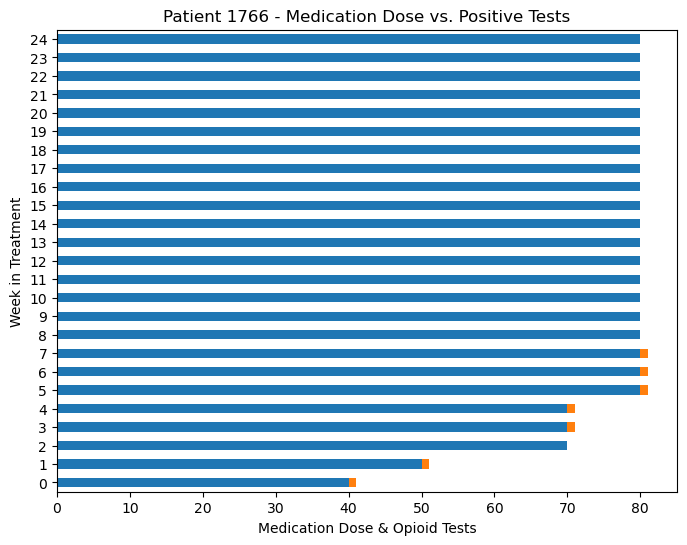

In [24]:
# every time you run this cell, you will get a random patient sample
# this is a snapshot of the patient's data for the 24 week period

f.loc[f.patdeid==random_sample(f)].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, figsize=(8,6),
                                            title=(f'Patient {random_sample(f)} - Medication Dose vs. Positive Tests'),
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment');

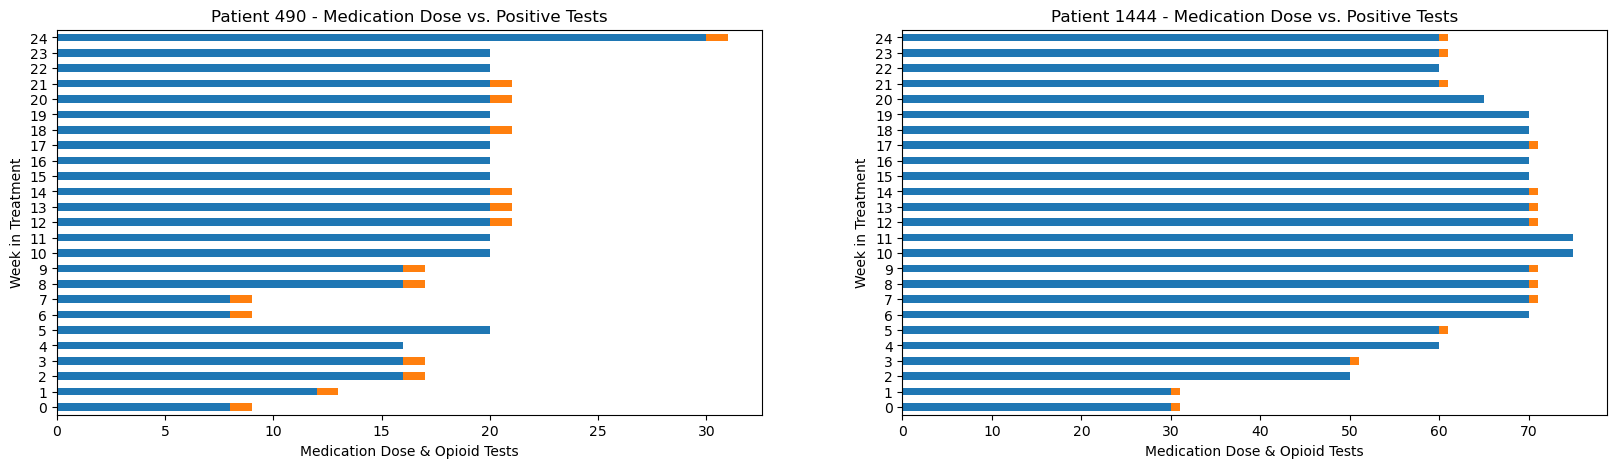

In [25]:
# create 2 plots next to eachother

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

# Patient 1
f.loc[f.patdeid==random_sample(f)].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, 
                                            title=(f'Patient {random_sample(f)} - Medication Dose vs. Positive Tests'),
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment',ax=ax1);

# Patient 2                                                
f.loc[f.patdeid==random_sample(f)].groupby('VISIT').agg({'total_dose':'sum',
                                          't_Opiate300':'sum'}).plot(
                                            kind='barh', stacked=True, 
                                            title=(f'Patient {random_sample(f)} - Medication Dose vs. Positive Tests'),
                                            legend=False, xlabel='Medication Dose & Opioid Tests',
                                            ylabel='Week in Treatment',ax=ax2);



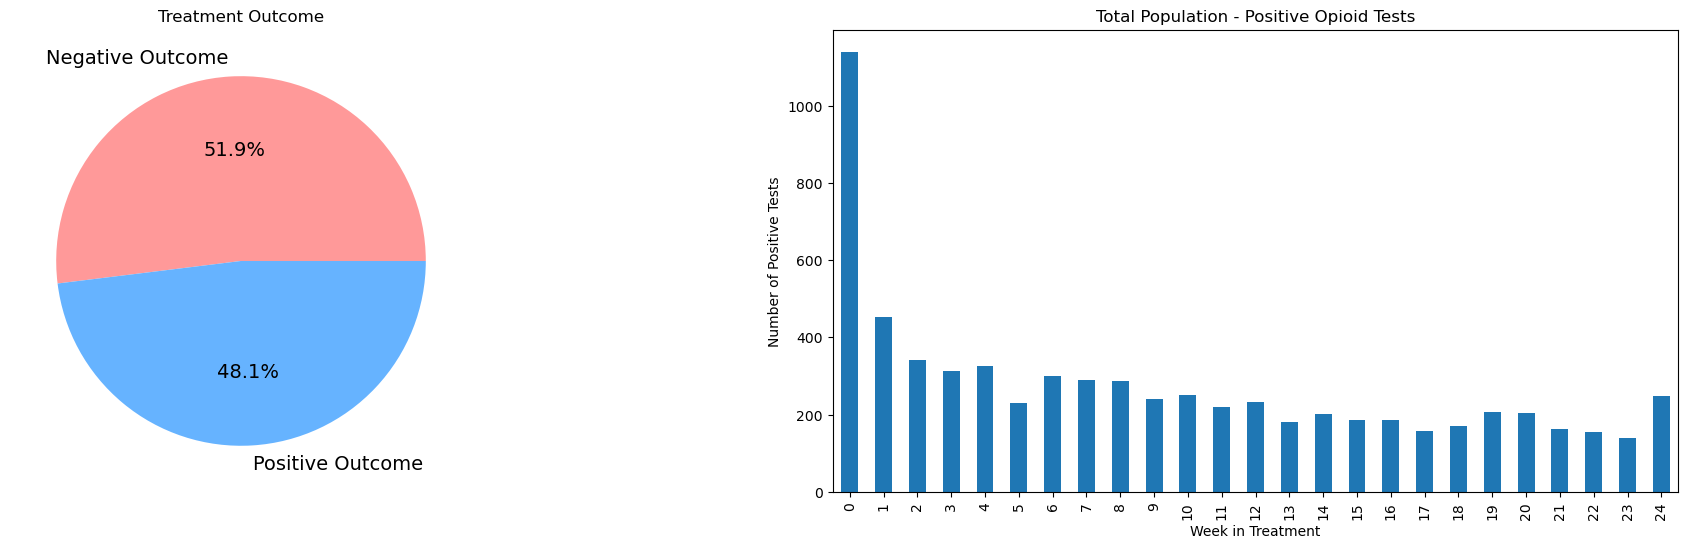

In [26]:
# plot 2 plots next to eachother

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,6))

# remove count from legend align to center

f.loc[f.c_t==1.0].outcome.value_counts().plot(kind='pie',
                                                title='Treatment Outcome',
                                                autopct='%1.1f%%',
                                                ylabel='',
                                                labels=['Negative Outcome','Positive Outcome'],
                                                colors=['#ff9999','#66b3ff'],
                                                textprops={'fontsize': 14},
                                                ax=ax1);



# plot lineplot for positive opiate tests for patients who completed treatment

f.groupby('VISIT').agg({'t_Opiate300':'sum'}).plot(kind='bar',  
                                                   legend=False,
                                                   title='Total Population - Positive Opioid Tests', 
                                                   xlabel='Week in Treatment', 
                                                   ylabel='Number of Positive Tests',
                                                   ax=ax2);


In [27]:
# save to csv for next step, one hot encoding

f.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/data_12SEP23.csv', index=False)